## SVM


In [3]:
import sys
import sklearn 
import numpy as np 
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

iris =  datasets.load_iris()
X= iris['data'][:, (2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)

X= X[setosa_or_versicolor]
y= y[setosa_or_versicolor]

svm_clf = SVC(kernel= 'linear', C= float('inf'))
svm_clf.fit(X, y)

,C,inf
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


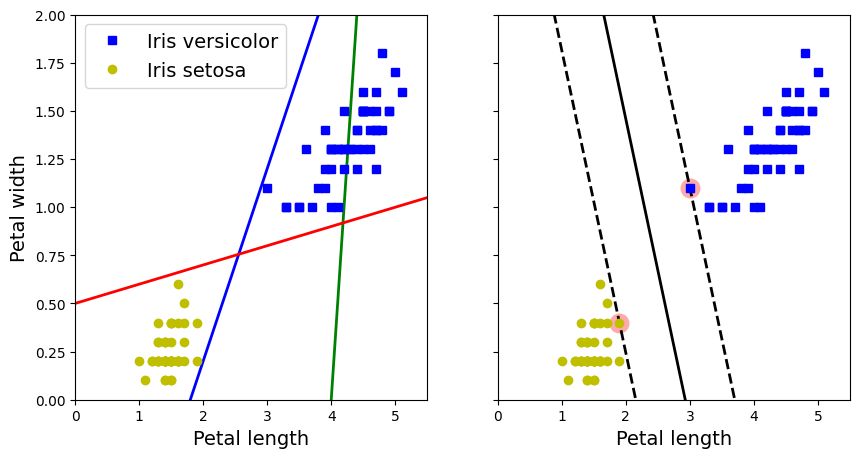

In [6]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    x1 = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = x1 + margin
    gutter_down = x1 - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, x1, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)  

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, 'g-', linewidth=2)
plt.plot(x0, pred_2, 'b-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()
